# Circular Night Time Lights Patches

Create an HDF5 file with 10Km circular patchs of the nightime lights raster for 
each SEZ. 

This will create a patches file and publish it to the web, at: 

http://public.source.civicknowledge.com.s3.amazonaws.com/sez/sez_circ_patches.h5


You can get these data packages via the ['sez' tag at the SDRDL Data Repository](https://data.sandiegodata.org/?s=sez)

In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rowgenerators as rg
import fiona
import rasterio
import rasterio.mask
from IPython.display import display 
from rasterio.plot import reshape_as_raster, reshape_as_image, show
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
from requests import get  # to make GET request
import boto3
import h5py 

%matplotlib inline
sns.set_context('notebook')


In [2]:
# Open the two main data packages
sez_p = mp.open_package('http://library.metatab.org/worldbank.org-sez-1.1.1.csv')
ntl_p = mp.open_package('http://library.metatab.org/figshare.com-harmonized_ntl-1.1.1.csv')

# Displaying the package shows metadata
sez_p


# Special economic zones
`worldbank.org-sez-1.1.1` Last Update: 2021-07-12T20:47:42

_Information on special economic zones have been individually collected and researched in a study focusing on the governance of SEZ. This is just a subset (586) of the extant global SEZs, which have been estimated at 3500-4000._


## Documentation Links

* [Documentation Page](http://library.metatab.org/worldbank.org-sez-1.1.1/index.html) 
* [Dataset webpage](https://datacatalog.worldbank.org/dataset/special-economic-zones-sez) 
* [Dataset viewer web application](http://devseed.com/sez-viewer/#/BGD6) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [sez](http://library.metatab.org/worldbank.org-sez-1.1.1/data/sez.csv)**. Special Economic Zones

In [3]:
ntl_p

# Multiyear Nightime Light Intensity
`figshare.com-harmonized_ntl-1.1.1` Last Update: 2021-07-12T20:47:57

_Temporally calibrated DMSP-OLS NTL time series data from 1992-2013; and converted NTL time series from the VIIRS data (2014-2018) Spatial resolution: 30 arc-seconds (~1km)_


This dataset provides reference links to each of the annual noghtime lights images from a
collection of images built from DMSP and VIIRS data, for the years 1992 to 2018.
## Documentation Links

* [Documentation Page](http://library.metatab.org/figshare.com-harmonized_ntl-1.1.1/index.html) 
* [Research paper](https://www.nature.com/articles/s41597-020-0510-y) 
* [Download page](https://figshare.com/articles/dataset/Harmonization_of_DMSP_and_VIIRS_nighttime_light_data_from_1992-2018_at_the_global_scale/9828827/2) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)
* **Creator** Xuecao Li, Department of Geological and Atmospheric Sciences, Iowa State University
* **Creator** Yuyu Zhou, Department of Geological and Atmospheric Sciences, Iowa State University
* **Creator** Min Xhao, Department of Geological and Atmospheric Sciences, Iowa State University
* **Creator** Xia Zhao, Department of Geological and Atmospheric Sciences, Iowa State University


## References
<ul><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2008_calDMSP.tif&resource_format=zip">ntl2008</a></strong>. Wordlwide night times lights raster, 2008</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2009_calDMSP.tif&resource_format=zip">ntl2009</a></strong>. Wordlwide night times lights raster, 2009</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2010_calDMSP.tif&resource_format=zip">ntl2010</a></strong>. Wordlwide night times lights raster, 2010</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2011_calDMSP.tif&resource_format=zip">ntl2011</a></strong>. Wordlwide night times lights raster, 2011</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2012_calDMSP.tif&resource_format=zip">ntl2012</a></strong>. Wordlwide night times lights raster, 2012</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2013_calDMSP.tif&resource_format=zip">ntl2013</a></strong>. Wordlwide night times lights raster, 2013</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2014_simVIIRS.tif&resource_format=zip">ntl2014</a></strong>. Wordlwide night times lights raster, 2014</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2015_simVIIRS.tif&resource_format=zip">ntl2015</a></strong>. Wordlwide night times lights raster, 2015</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2016_simVIIRS.tif&resource_format=zip">ntl2016</a></strong>. Wordlwide night times lights raster, 2016</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2017_simVIIRS.tif&resource_format=zip">ntl2017</a></strong>. Wordlwide night times lights raster, 2017</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2018_simVIIRS.tif&resource_format=zip">ntl2018</a></strong>. Wordlwide night times lights raster, 2018</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1992_calDMSP.tif&resource_format=zip">ntl1992</a></strong>. Wordlwide night times lights raster, 1992</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1993_calDMSP.tif&resource_format=zip">ntl1993</a></strong>. Wordlwide nig

In [4]:

# Create Dataframes
sez = sez_p.resource('sez').geoframe()

# Update the SEZ geometries to be a 20KM buffer around the point. We project to 
# EPSG:3395, World Mercator, to be able to make the buffer in meters. 
g =  sez.to_crs(3395).buffer(20_000)

sez['geo_area'] = g.area
sez['geometry'] = g.to_crs(4326)

# The operational date col is a string, so make an int year column. 
sez['year'] = pd.to_numeric(sez.operational_date, errors='coerce')


<AxesSubplot:>

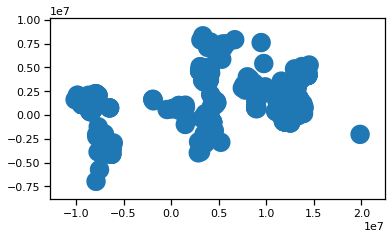

In [5]:
sez.to_crs(3395).buffer(1000000).plot()

In [6]:
# Load a year of rasters, masked and cropped to a geometry
# See the rasterio documentation for more examples: 
# https://rasterio.readthedocs.io/en/latest/topics/masking-by-shapefile.html
def load_ntl(pkg, year, shapes=None):
    
    ref = pkg.reference(f'ntl{year}').resolved_url.get_resource().get_target()
    
    with rasterio.open(ref.fspath) as src:
        
        if shapes is not None:
            img, transform = rasterio.mask.mask(src, shapes, crop=True)
        else:
            img =  src.read()
            transform = None
            
        meta = src.meta
      
        
        return img, meta, transform



In [7]:
# Create a set of tasks parameters, year and geometry of the SEZ
tasks = [  (year, r.unique_id, r.geometry) for idx,r in sez.iterrows() for year in list(range(1992, 2018+1))]
print(len(tasks))

15768


In [8]:

tasks = tasks[:100]

# Run the extraction tasks in parallel
# First, define the function we will run in parallel
def _f(year, sez_id, geo):
    try:
        return (year, sez_id, load_ntl(ntl_p, year, [geo])[0])
    except Exception as e:
        (year, sez_id, e)

# Second, run the tasks
patches = Parallel(prefer='threads')(delayed(_f)(*t) for t in tqdm(tasks))

exc = [(year, sez_id,  e) for year, sez_id,  e in patches if isinstance(e, Exception)]
print(f"Exceptions: {len(exc)}")


  0%|          | 0/100 [00:00<?, ?it/s]

Exceptions: 0


In [9]:
# Write all of the patches to an HDF5 file

with h5py.File('sez_circ_patches.h5', 'w') as f:
    for year, sez_id,  e in patches:
        k = f'circle/{sez_id}/{year}'
        f[k] = e

In [10]:
# Upload the file to S3
# This won't work if you don't have acess to the bucket, which 
# you probably don't

if False:
    s3_client = boto3.client('s3')
    fn = 'sez_circ_patches.h5'
    s3_client.upload_file(fn, 'public.source.civicknowledge.com', 'sez/'+fn, ExtraArgs={'ACL': 'public-read'})



# Test the patches

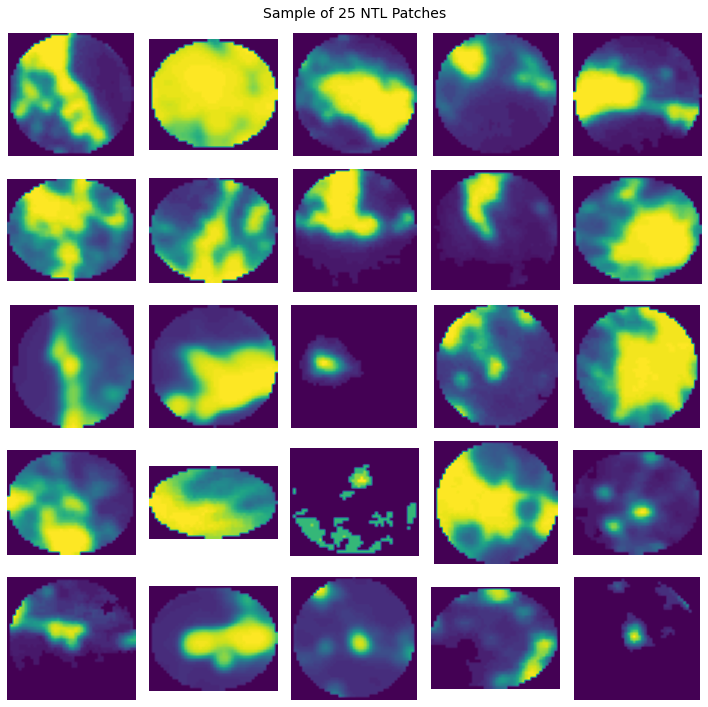

In [11]:
# Test the file upload

# Download the file
dl_fn = 'patches.h5'
with open(dl_fn, "wb") as file:
    # get request
    response = get('http://public.source.civicknowledge.com.s3.amazonaws.com/sez/sez_circ_patches.h5')
    # write to file
    file.write(response.content)
    
# Get a random selection of patches from the file
def get_hdf_keys(f):
    """Return all of the dataset keys in an HDF5 file"""
    keys = []
    f.visit(lambda key : keys.append(key) if isinstance(f[key], h5py.Dataset) else None)
    return keys

with h5py.File('patches.h5', 'r') as f:
    keys = get_hdf_keys(f)
    
# Plot a random sample
from random import shuffle
shuffle(keys)

fig, axes = plt.subplots(5,5, figsize=(10,10))
axes = np.ravel(axes)

with h5py.File('patches.h5', 'r') as f:
    for k, a in zip(keys[:len(axes)], axes):
        r = f[k][:]
        a.set_axis_off()
        show(r, ax=a)

fig.suptitle('Sample of 25 NTL Patches', fontsize=14)
plt.tight_layout()